# Ayudantía 5: Exploratory Data analysis (EDA)


Primero empezaremos un con pequeño repaso de lo que hemos visto:


Librerias:

1) Numpy

2) Pandas

3) Matplotlib

4) Seaborn


#### ¿Qué es EDA?


1)    Obtener Información (Data Sourcing)

2)    Limpieza de datos (Data Cleaning)

3)    Análisis unidimensional (Univariate analysis)

4)    (Bivariate analysis)

5)    (Multivariate analysis)

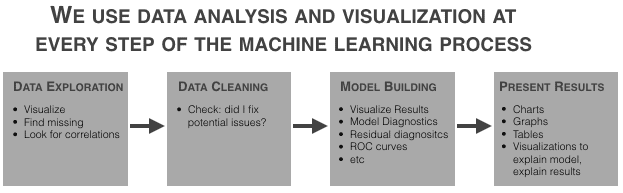




# Obtención de información (Data Sourcing)


- [Kaggle](www.kaggle.com)

- [Link 1 (bases de dato geniales)](https://github.com/awesomedata/awesome-public-datasets)

- [Tensorflow datasets](https://www.tensorflow.org/datasets?hl=es-419)

- [Sklearn toy datasets](https://scikit-learn.org/stable/datasets/index.html)

# Limpieza de datos  (Data Cleaning)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
# Read the data set of "Marketing Analysis" in data.
data= pd.read_csv("Marketing_Analysis.csv")

# Printing the data
data

C:\Users\kzep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [2]:
data = pd.read_csv("Marketing_Analysis.csv",skiprows = 2)

#print the head of the data frame.
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)

#Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Printing the Dataset
data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [4]:
# Checking the missing values
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [5]:
# Dropping the records with age missing in data dataframe.
data = data[~data.age.isnull()].copy()

# Checking the missing values in the dataset.
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [6]:
# Find the mode of month in data
month_mode = data.month.mode()[0]

# Fill the missing values with mode value of month in data.
data.month.fillna(month_mode, inplace = True)

# Let's see the null values in the month column.
data.month.isnull().sum()

0

In [7]:
data.head(7)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,28.0,100000,447,single,no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary


In [8]:
data.salary

0        100000
1         60000
2        120000
3         20000
4             0
          ...  
45206     60000
45207     55000
45208     55000
45209     20000
45210    120000
Name: salary, Length: 45191, dtype: int64

# Análisis unidimensional

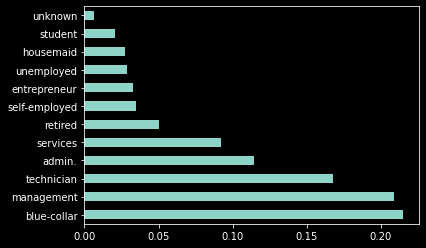

In [9]:
# Let's calculate the percentage of each job status category.
data.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()

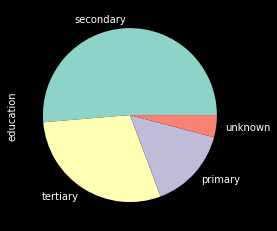

In [10]:
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)

#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [11]:
data.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

# Análisis bivariado (Bivariate analysis)

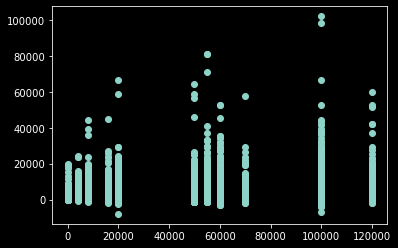

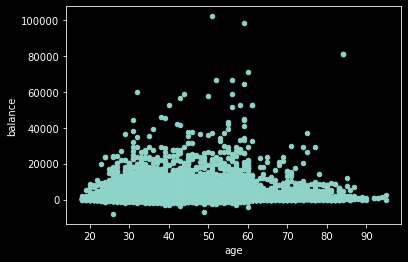

In [12]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.show()

#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.show()

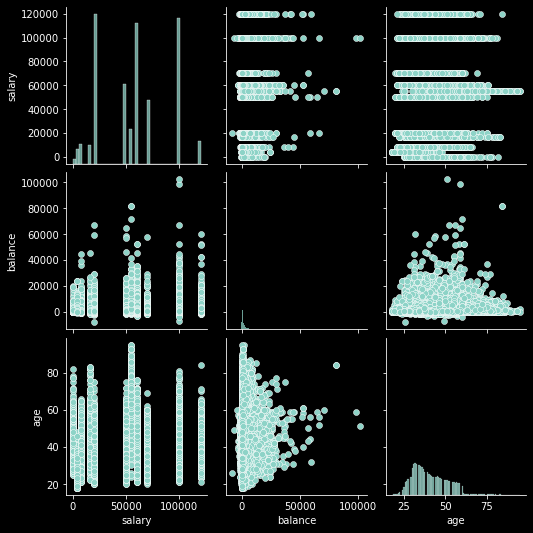

In [13]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = data, vars=['salary','balance','age'])
plt.show()

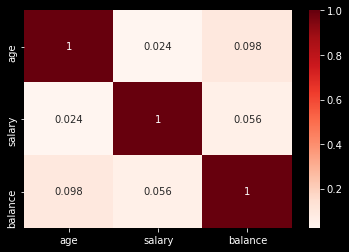

In [14]:
# Creating a matrix using age, salry, balance as rows and columns
data[['age','salary','balance']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [15]:
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [16]:
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

C:\Users\kzep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


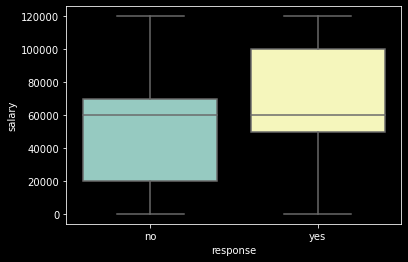

In [17]:
sns.boxplot(data.response, data.salary)
plt.show()

In [18]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

0    39906
1     5285
Name: response_rate, dtype: int64

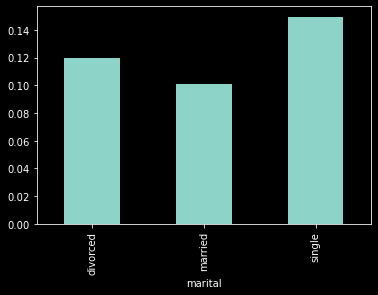

In [19]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

# Análisis multivariado (Multivariate analysis)

marital    divorced   married    single
education                              
primary    0.138667  0.075515  0.106808
secondary  0.103485  0.094595  0.129213
tertiary   0.137415  0.129761  0.183546
unknown    0.142012  0.122414  0.162879


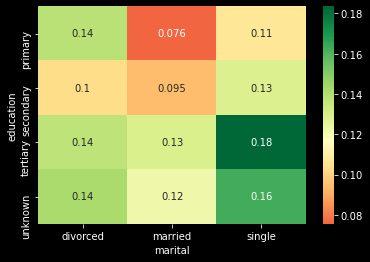

In [20]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Referencias:


- [What is eda](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

- [Exploratory data analysis](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14)

- [Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)

- [EDA Video](https://www.youtube.com/watch?v=9m4n2xVzk9o)